In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
sheet_1 = 'Labor projections 2019-2028'
sheet_2 = 'Labor projections 2019-2029'
sheet_3 = 'CNIP projections 2019-2028'
sheet_4 = 'CNIP projections 2019-2029'
sheet_5 = 'LFPR projections 2019-2028'
sheet_6 = 'LFPR projections 2019-2029'

In [21]:
path = 'Compare19&20.xlsx'
table1 = pd.read_excel(path, sheet_name=sheet_5,skiprows=[0],header=[1],index_col=[0])
table2 = pd.read_excel(path, sheet_name=sheet_6,skiprows=[0],header=[1],index_col=[0])

In [22]:
print("Please select the race and gender label from the list below:")
print("Total Labor Force, LF Men, LF Women, LF  White, LF White Men, LF White Women, LF Black, \
LF Black Men, LF Black Women, LF \"All Others\" (1), LF \"All Other\" Men, LF \"All Other\" Women, LF Hispanic, \
LF Hispanic Men, LF Hispanic Women, LF non Hispanic, LF non Hispanic Men, LF non Hispanic Women")
label = input()

Please select the race and gender label from the list below:
Total Labor Force, LF Men, LF Women, LF  White, LF White Men, LF White Women, LF Black, LF Black Men, LF Black Women, LF "All Others" (1), LF "All Other" Men, LF "All Other" Women, LF Hispanic, LF Hispanic Men, LF Hispanic Women, LF non Hispanic, LF non Hispanic Men, LF non Hispanic Women
Total Labor Force


In [23]:
subset_1 = table1[(table1.Label == label)]
subset_2 = table2[(table2.Label == label)]

In [24]:
def COMPARE_ACROSS_AGE(data_1,data_2):
    
    fig, axs = plt.subplots(5,2,sharex='col',sharey='row',figsize=(12, 16))

    i = 0
    m = 0
    n = 0
    while m <= 4:
        for n in range(2):
            Year = data_1.columns[i]
            x = np.arange(14)
            y1 = list(data_1[Year])[1:]
            y2 = list(data_2[Year])[1:]
    
            bar_width = 0.35
            tick_label = ["16-17", "18-19", "20-24", "25-29", "30-34", "35-39", 
                    "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75+"]

            axs[m,n].bar(x, y1, bar_width, color="c", align = "center", label="previous release", alpha=0.5)
            axs[m,n].bar(x+bar_width, y2, bar_width, color="b", align = "center", label="latest release", alpha=0.5, 
            tick_label = tick_label)
            axs[m,n].set_xticklabels(tick_label, rotation=315)
            axs[m,n].set_title(Year)
            axs[m,n].legend(['previous release', 'latest release'])
            i += 1
        m += 1
    fig.suptitle("Comparison for Each Age Group in Different Years - "+ label,x=0.5,y=1,fontsize=20)
    fig.tight_layout(pad=3.0, w_pad=1.0, h_pad=1.0)

    for ax in axs.flat:
        ax.label_outer() 
    fig.text(0.5, 0, "Age Groups", ha='center', va='center',fontsize=16)
    fig.text(0, 0.5, "Population Projection", ha='center', va='center', rotation='vertical',fontsize=16)

In [25]:
def COMPARE_ACROSS_YEAR(data_1,data_2):

    fig, axs = plt.subplots(5,3,sharex='col',sharey='row',figsize=(18, 16))
    i = 0
    m = 0
    n = 0
    age_list = ["Total", "16-17", "18-19", "20-24", "25-29", "30-34", "35-39", 
    "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75+"]
    while m <= 4:
        for n in range(3):
            age = age_list[i]
            x_index = list(range(2019,2029))
            y_1 = list(data_1.iloc[i,:])[:-2]
            y_2 = list(data_2.iloc[i,:])[:-2]
            axs[m,n].plot(x_index,y_1)
            axs[m,n].plot(x_index,y_2) 
            axs[m,n].set_title(age)
            axs[m,n].legend(['previous release', 'latest release'])
            i += 1
        m += 1
    
    fig.suptitle("Comparison for Each Year in Different Age Groups - "+ label,x=0.5,y=1,fontsize=20)
    fig.tight_layout(pad=3.0, w_pad=1.0, h_pad=1.0)

    for ax in axs.flat:
        ax.label_outer()
    fig.text(0.5, 0, "Year", ha='center', va='center',fontsize=16)
    fig.text(0, 0.5, "Population Projection", ha='center', va='center', rotation='vertical',fontsize=16)

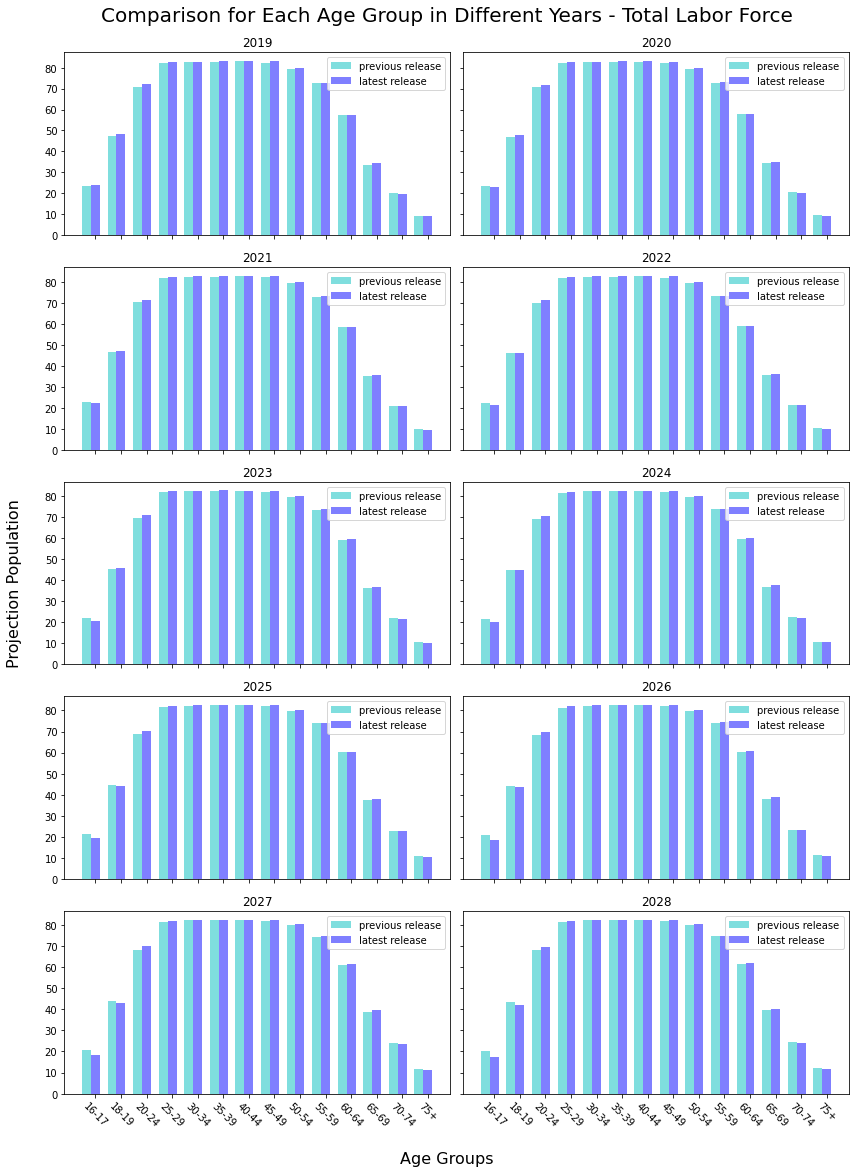

In [26]:
COMPARE_ACROSS_AGE(subset_1,subset_2)

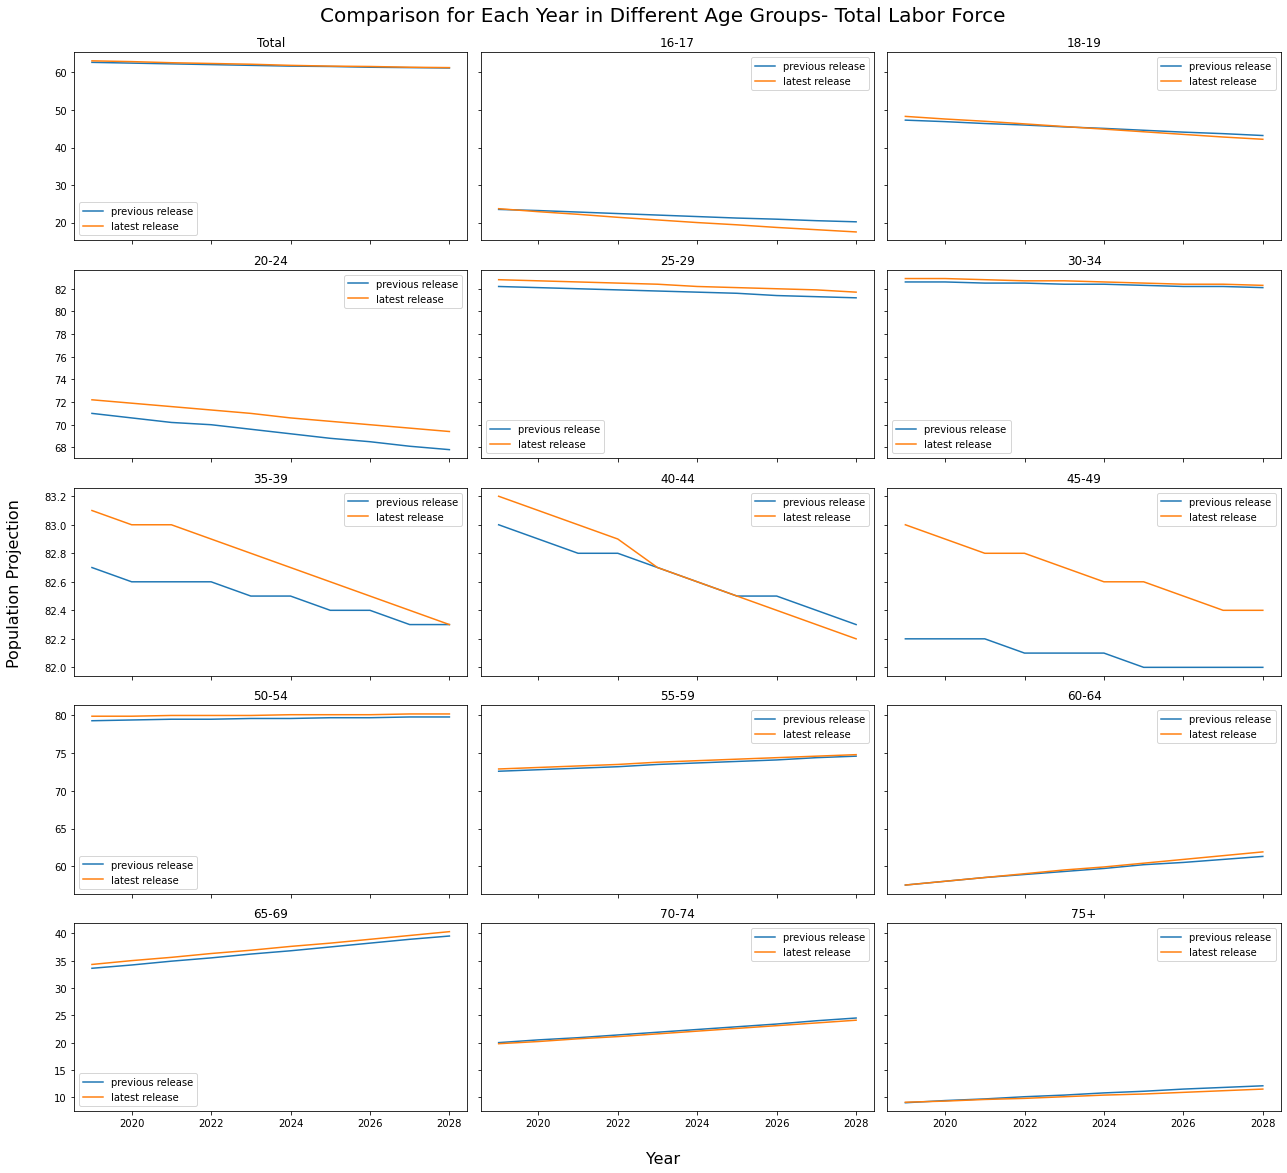

In [27]:
COMPARE_ACROSS_YEAR(subset_1,subset_2)

Please enter a year from 2019-2028:
2021


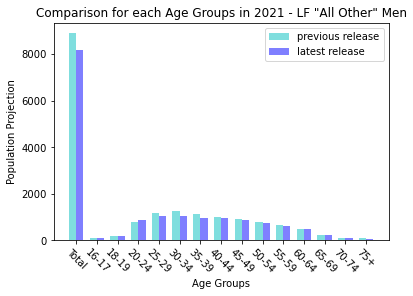

In [33]:
print("Please enter a year from 2019-2028:")
Year = input()
Year = eval(Year)

x = np.arange(15)
y1 = list(subset_1[Year])
y2 = list(subset_2[Year])

bar_width = 0.35
tick_label = ["Total", "16-17", "18-19", "20-24", "25-29", "30-34", "35-39", 
"40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75+"]

plt.bar(x, y1, bar_width, color="c", align = "center", label="previous release", alpha=0.5)
plt.bar(x+bar_width, y2, bar_width, color="b", align = "center", label="latest release", alpha=0.5, 
        tick_label = tick_label)

plt.xlabel("Age Groups")
plt.ylabel("Population Projection")

plt.xticks(x+bar_width/2, tick_label, rotation=315)
plt.title("Comparison for each Age Groups in " + str(Year)+' - '+label)
plt.legend()

plt.show()

Please select an age group and enter the serial number from the list below:
1:Total, 2:16-17, 3:18-19, 4:20-24, 5:25-29, 6:30-34, 7:35-39, 8:40-44, 9:45-49, 10:50-54, 11:55-59, 12:60-64, 13:65-69, 14:70-74, 15:75+
5


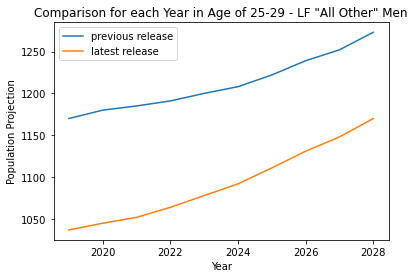

In [32]:
age_list = ["Total", "16-17", "18-19", "20-24", "25-29", "30-34", "35-39", 
"40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75+"]
print("Please select an age group and enter the serial number from the list below:")
print("1:Total, 2:16-17, 3:18-19, 4:20-24, 5:25-29, 6:30-34, 7:35-39, 8:40-44, 9:45-49, 10:50-54, 11:55-59, 12:60-64, 13:65-69, 14:70-74, 15:75+")
age = input()
age = eval(age)
x_index = list(range(2019,2029))
y_1 = list(subset_1.iloc[age-1,:])[:-2]
y_2 = list(subset_2.iloc[age-1,:])[:-2]

plt.plot(x_index,y_1)
plt.plot(x_index,y_2)
plt.title("Comparison for each Year in Age of "+ age_list[age-1]+' - '+label)
plt.xlabel('Year')
plt.ylabel('Population Projection')
plt.legend(['previous release', 'latest release'])
plt.show()